In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #  print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
import torch.nn as nn
import torchvision

In [3]:
def walk_through_files(dir_path):
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


In [4]:
walk_through_files("/kaggle/input/aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_train")

There are 29 directories and 0 images in /kaggle/input/aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_train
There are 0 directories and 7932 images in /kaggle/input/aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_train/N
There are 0 directories and 8021 images in /kaggle/input/aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_train/R
There are 0 directories and 7071 images in /kaggle/input/aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_train/space
There are 0 directories and 8309 images in /kaggle/input/aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_train/B
There are 0 directories and 7953 images in /kaggle/input/aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_train/I
There are 0 directories and 6836 images in /kaggle/input/aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_train/del
Ther

In [5]:
!pip install split-folders

In [6]:
from pathlib import Path
data_path=Path("/kaggle/input")
train_dir=data_path/"aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_train"

In [7]:
from PIL import Image
import random
import cv2 
import cv2 as cv

/kaggle/input/aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_train/I/I1560.jpg
I
200
200


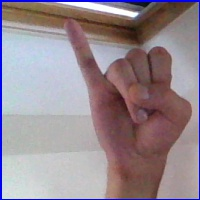

In [8]:
image_path_list=list(train_dir.glob("*/*.jpg"))
random_image_path=random.choice(image_path_list)

image_class=random_image_path.parent.stem
img=Image.open(random_image_path)


print(random_image_path)
print(image_class)
print(img.height)
print(img.width)
img

In [9]:
import splitfolders as sf
data_path=Path("/kaggle/input/aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_train")
sf.ratio(data_path,output="output",ratio=(0.8,0.2))

Copying files: 223074 files [17:12, 216.09 files/s]


In [10]:
import shutil

In [11]:
shutil.rmtree("/kaggle/working/output/train/del")
shutil.rmtree("/kaggle/working/output/train/nothing")
shutil.rmtree("/kaggle/working/output/val/nothing")
shutil.rmtree("/kaggle/working/output/val/del")

In [12]:
import matplotlib.pyplot as plt
from torchvision import transforms,datasets
from torch.utils.data import DataLoader

In [13]:
train_transformations=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
    
])

test_transformations=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [14]:
data_path=Path("/kaggle/working/output")
train_dir=Path("/kaggle/working/output/train")
test_dir=Path("/kaggle/working/output/val")

In [15]:
train_data=datasets.ImageFolder(root=train_dir,transform=train_transformations)
test_data=datasets.ImageFolder(root=test_dir,transform=test_transformations)

len(train_data),len(test_data)

(170555, 42653)

In [16]:
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 170555
     Root location: /kaggle/working/output/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 42653
     Root location: /kaggle/working/output/val
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [17]:
labels=train_data.classes
labels

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'space']

In [ ]:
im,label=train_data[99999]
plt.imshow(im.permute(1,2,0))
plt.title(labels[label])

Text(0.5, 1.0, 'P')

In [ ]:
batch_size=32
train_dataloader=DataLoader(dataset=train_data,batch_size=32,shuffle=True)
test_dataloader=DataLoader(dataset=test_data,batch_size=32,shuffle=True)

train_dataloader,test_dataloader

In [20]:
len(train_dataloader),len(test_dataloader)

(5330, 1333)

In [21]:
device="cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [22]:
def train_step(model,dataloader,loss_fn,optimizer):
    model.train()
    
    train_loss,train_acc=0,0
    for batch,(x,y) in enumerate(dataloader):
        x,y=x.to(device),y.to(device)
        y_pred=model(x)
        loss=loss_fn(y_pred,y)
        optimizer.zero_grad()
        
        train_loss+=loss.item()
        
        loss.backward()
        optimizer.step()
        
        y_labels=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        train_acc+=((y_labels==y).sum().item())/len(y)
        
    train_loss=train_loss/len(dataloader)
    train_acc=train_acc/len(dataloader)
    
    return train_loss,train_acc 

In [23]:
def train(model,train_dataloader,test_dataloader,loss_fn,optimizer,epochs):
    from tqdm.auto import tqdm
    
    results={"train_loss":[],"train_acc":[],"test_loss":[],"test_acc":[]}
    
    for i in tqdm(range(epochs)):
        train_loss,train_acc=train_step(model,train_dataloader,loss_fn,optimizer)
        test_loss,test_acc=test_step(model,test_dataloader,loss_fn)
        
        print(
            f"Epoch: {i+1} | "
            f"Train_loss: {train_loss:.4f} | "
            f"Train_acc: {train_acc:.4f} | "
            f"Test_loss: {test_loss:.4f} | "
            f"Test_acc: {test_acc:.4f}"
        )
        
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
    return results

In [24]:
def test_step(model,dataloader,loss_fn):
    model.eval()
    test_loss,test_acc=0,0
    with torch.inference_mode():
        for batch,(x,y) in enumerate(dataloader):
            x,y=x.to(device),y.to(device)
            y_pred=model(x)
            loss=loss_fn(y_pred,y)
            
            test_loss+=loss.item()
            
            y_labels=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
            test_acc+=((y_labels==y).sum().item())/len(y)
            
    test_loss=test_loss/len(dataloader)
    test_acc=test_acc/len(dataloader)
    
    return test_loss,test_acc

In [25]:
model1=torchvision.models.googlenet(pretrained=True)
model1

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:01<00:00, 34.1MB/s]


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [26]:
from torchinfo import summary
len(labels)

27

In [27]:
model1.fc=nn.Sequential(
    nn.Linear(in_features=1024,out_features=256),
    nn.Dropout(p=0.2),
    nn.Linear(in_features=256,out_features=27)
)

In [28]:
model1.to(device)
summary(model1,input_size=[32,3,224,224])

Layer (type:depth-idx)                   Output Shape              Param #
GoogLeNet                                [32, 27]                  --
├─BasicConv2d: 1-1                       [32, 64, 112, 112]        --
│    └─Conv2d: 2-1                       [32, 64, 112, 112]        9,408
│    └─BatchNorm2d: 2-2                  [32, 64, 112, 112]        128
├─MaxPool2d: 1-2                         [32, 64, 56, 56]          --
├─BasicConv2d: 1-3                       [32, 64, 56, 56]          --
│    └─Conv2d: 2-3                       [32, 64, 56, 56]          4,096
│    └─BatchNorm2d: 2-4                  [32, 64, 56, 56]          128
├─BasicConv2d: 1-4                       [32, 192, 56, 56]         --
│    └─Conv2d: 2-5                       [32, 192, 56, 56]         110,592
│    └─BatchNorm2d: 2-6                  [32, 192, 56, 56]         384
├─MaxPool2d: 1-5                         [32, 192, 28, 28]         --
├─Inception: 1-6                         [32, 256, 28, 28]         --
│

In [29]:
loss_fn1=nn.CrossEntropyLoss()
optimizer1=torch.optim.Adam(params=model1.parameters(),lr=0.01)

from timeit import default_timer as timer 
start_time = timer()


results1=train(model=model1,
              train_dataloader=train_dataloader,
              test_dataloader=test_dataloader,
              loss_fn=loss_fn1,
              optimizer=optimizer1,
              epochs=10
             )

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | Train_loss: 1.6931 | Train_acc: 0.4861 | Test_loss: 0.4001 | Test_acc: 0.8746
Epoch: 2 | Train_loss: 0.3214 | Train_acc: 0.9008 | Test_loss: 0.1771 | Test_acc: 0.9455
Epoch: 3 | Train_loss: 0.1904 | Train_acc: 0.9430 | Test_loss: 0.1335 | Test_acc: 0.9612
Epoch: 4 | Train_loss: 0.1475 | Train_acc: 0.9581 | Test_loss: 0.1141 | Test_acc: 0.9711
Epoch: 5 | Train_loss: 0.1274 | Train_acc: 0.9653 | Test_loss: 0.0725 | Test_acc: 0.9789
Epoch: 6 | Train_loss: 0.1067 | Train_acc: 0.9719 | Test_loss: 0.0482 | Test_acc: 0.9857
Epoch: 7 | Train_loss: 0.0991 | Train_acc: 0.9746 | Test_loss: 0.0583 | Test_acc: 0.9827
Epoch: 8 | Train_loss: 0.0902 | Train_acc: 0.9774 | Test_loss: 0.0553 | Test_acc: 0.9860
Epoch: 9 | Train_loss: 0.0847 | Train_acc: 0.9794 | Test_loss: 0.0578 | Test_acc: 0.9864
Epoch: 10 | Train_loss: 0.0820 | Train_acc: 0.9809 | Test_loss: 0.0641 | Test_acc: 0.9861
Total training time: 9519.584 seconds


In [30]:
def plot_loss_curves(results):
    train_loss=results["train_loss"]
    train_acc=results["train_acc"]
    
    test_loss=results["test_loss"]
    test_acc=results["test_acc"]
    
    epochs=range(len(results["test_loss"]))
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,2,1)
    plt.plot(epochs,train_loss,label="Train Loss")
    plt.plot(epochs,test_loss,label="Test Loss")
    plt.legend()
    plt.xlabel("Epochs")
    plt.title("Loss")
    
    
    plt.subplot(1,2,2)
    plt.plot(epochs,train_acc,label="Train Accuracy")
    plt.plot(epochs,test_acc,label="Test Accuracy")
    plt.legend()
    plt.xlabel("Epochs")
    plt.title("Accuracy")

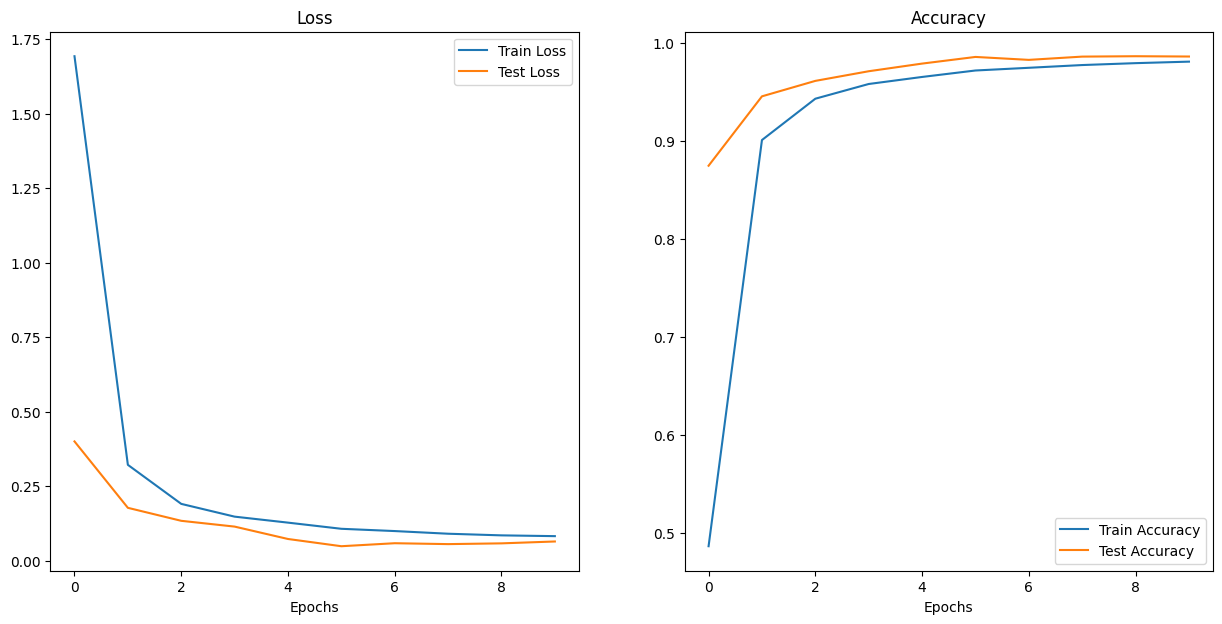

In [31]:
plot_loss_curves(results1)

In [32]:
model_path=Path("/kaggle/working/models")
model_path.mkdir(parents=True,exist_ok=True)

model_name="Sign Language Model_GoogleNet_250000.pth"
model_save_path=model_path/model_name

print("Saving model to:",model_save_path)
torch.save(obj=model1.state_dict(),
           f=model_save_path)

Saving model to: /kaggle/working/models/Sign Language Model_GoogleNet_250000.pth


In [35]:
def load_model(model_path):
    with torch.no_grad():
        predictor=torchvision.models.googlenet()
        predictor.aux1=None
        predictor.aux2=None #LeNet
        predictor.fc=nn.Sequential(
            nn.Linear(in_features=1024,out_features=256),
            nn.Dropout(p=0.2),
            nn.Linear(in_features=256,out_features=27)
        )
        state_dict=torch.load(model_path,map_location="cpu")
        predictor.load_state_dict(state_dict)
        predictor.to(device)
        predictor.eval()
        return predictor

In [36]:
model2=load_model("/kaggle/working/models/Sign Language Model_GoogleNet_250000.pth")
model2

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [50]:
def predict_letter(model,img):
    with torch.no_grad():
        img=img.unsqueeze(dim=0)
        gs=model(img)
        tags=torch.softmax(gs,dim=1)
        print(tags)
        tag=torch.argmax(tags,dim=1)
        return tag.item()

In [54]:
img2=Image.open("/kaggle/input/aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_test/A_test.jpg")
converter=transforms.ToTensor()
img=converter(img2)
tag=predict_letter(model2,img.to(device))
labels[tag]

tensor([[5.9572e-01, 2.5649e-01, 5.4019e-02, 8.5295e-03, 1.1785e-02, 1.9660e-03,
         6.0003e-03, 3.2085e-02, 5.7499e-03, 1.5920e-04, 7.9928e-03, 8.0674e-05,
         1.3473e-02, 4.2302e-04, 4.2174e-04, 4.4273e-05, 4.6110e-04, 3.2222e-03,
         5.1254e-04, 4.4187e-05, 9.1156e-05, 1.4288e-05, 2.8119e-04, 3.4748e-04,
         3.6397e-06, 7.6572e-05, 6.9804e-06]], device='cuda:0')


'A'

In [55]:
img2=Image.open("/kaggle/input/aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_test/space_test.jpg")
converter=transforms.ToTensor()
img=converter(img2)
tag=predict_letter(model2,img.to(device))
labels[tag]

tensor([[6.8582e-19, 1.6957e-14, 9.4280e-13, 1.2811e-11, 2.5316e-17, 3.5100e-13,
         1.1070e-14, 1.9824e-11, 2.4781e-14, 3.0773e-13, 1.0095e-14, 4.8739e-14,
         3.2630e-12, 1.0800e-12, 3.2150e-12, 3.7606e-16, 7.6876e-14, 4.8837e-17,
         1.2044e-17, 2.3186e-17, 6.9831e-13, 2.8290e-15, 4.4607e-18, 3.9263e-17,
         1.3624e-14, 1.2273e-14, 1.0000e+00]], device='cuda:0')


'space'

In [57]:
img2=Image.open("/kaggle/input/aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_test/B_test.jpg")
converter=transforms.ToTensor()
img=converter(img2)
tag=predict_letter(model2,img.to(device))
labels[tag]

tensor([[1.3457e-13, 9.9957e-01, 4.8007e-12, 2.2756e-15, 4.2974e-15, 8.5760e-13,
         2.6964e-16, 1.5693e-12, 6.8402e-20, 2.1331e-17, 2.3227e-08, 1.6180e-20,
         8.1777e-13, 3.4874e-18, 4.2907e-14, 2.1050e-15, 4.5831e-16, 1.0903e-09,
         4.6124e-19, 9.8825e-20, 4.3425e-04, 2.5851e-12, 4.5903e-08, 2.4125e-17,
         3.3920e-22, 1.6097e-16, 2.7669e-12]], device='cuda:0')


'B'